Author: Siyuan Shao

# Problem

Train a model to predict whether a passenger would have survived or not.



### Data Dictionary (from online research)

- PassengerId: Unique ID of a passenger
- Pclass: Ticket class
- Name: Name of a passenger
- Sex: Sex of a passenger
- Age: Age of a passenger
- SibSp: Number of Siblings/Spouses aboard
- Parch: Number of Parents/Children aboard
- Ticket: Unique Ticket Number
- Fare: Fare of a passenger
- Cabin: Cabin number
- Embarked: Port of embarkation

In [ ]:
# import basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [ ]:
# read data
df = pd.read_csv("titanic.csv")

**1. Getting familiar with the data**

In [ ]:
# peak the data frame
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,"Henry, Miss. Delia",male,NaN,NaN,NaN,1601,NaN,B96 B98,S,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,446.000000,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.383838
std,257.353842,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.486592
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,223.500000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000
50%,446.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,668.500000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


**2. Check for the completeness of data**

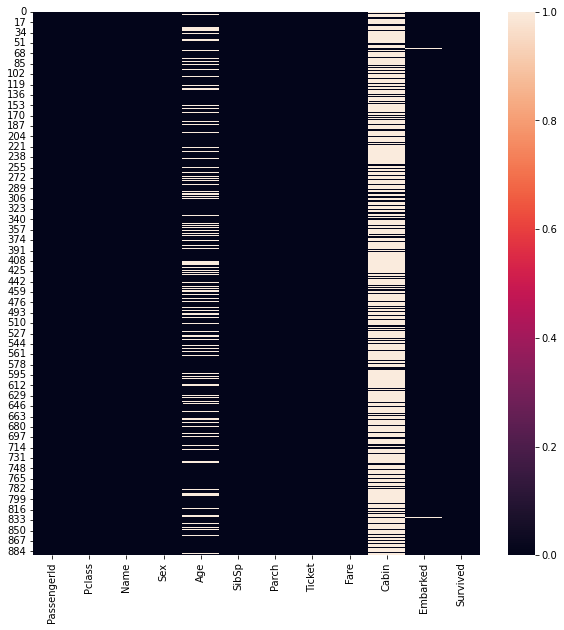

In [ ]:
# a general view of missing data from heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull())

In [ ]:
# a more detailed stats regarding the missing data
total_missing = df.isnull().sum() # missing cells by columns
p1 = total_missing / df.isnull().count()*100
missing_data = pd.concat([total_missing, p1], axis=1, keys=['#Missing', '%Missing'])
missing_data


,#Missing,%Missing
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Cabin,687,77.104377


**3. Problem & Data Interpretation**

According to the analysis above, we can draw a few rough conclusions (not finalized):
1. Overall the data is relatively complete, in the sense that most columns have 0 missing values.
2. In our further analysis, `Cabin` column is likely to be **removed**, since around 77% of the values are missing (See step 5).
3. `Age` is another field that requires investigation, as more than 19% of the values are missing, and the minimum age is 0.4, which is less likely to be accurate.
4. Columns like `PassengerId` and `Ticket` are likely to to **excluded**, since they are unique and less related to the survival rate (See step 5).
5. Columns like `Sex` and `Embarked` need to be converted to numerical values, in order for the model to process.
6. `Name` column contain Passengers' First name & Last name, as well as Title (e.g. Mr, Miss, Mrs), which could be a useful information.



**4. Exploratory Data Analysis**

Text(0, 0.5, 'Count')

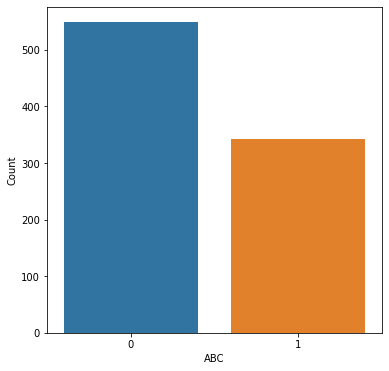

In [ ]:
# 1. check out how many people survived
plt.figure(figsize=(6,6))
sns.countplot(df['Survived'])
plt.xlabel('ABC')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

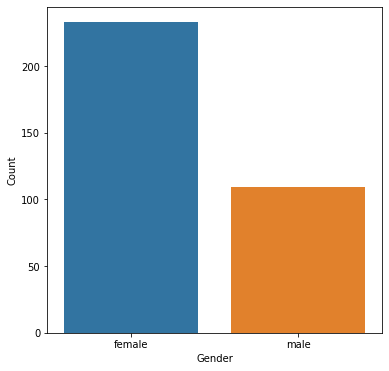

In [ ]:
# 2. survival number by gender
plt.figure(figsize=(6,6))
df_survived = df[df['Survived']==1]
sns.countplot(df_survived['Sex'])
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

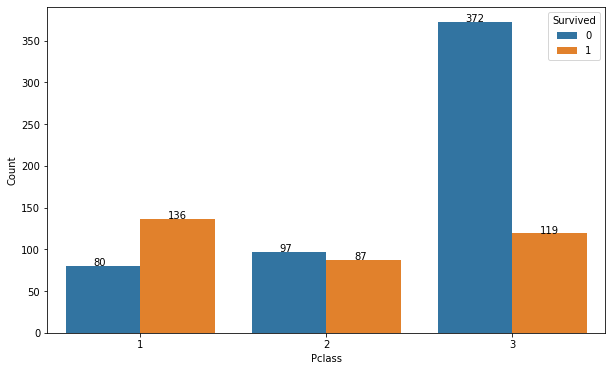

In [ ]:
# 3. survival number by ticket class
plt.figure(figsize=(10,6))
ax = sns.countplot(data = df, x = 'Pclass', hue = 'Survived')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.1))
plt.xlabel('Pclass')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

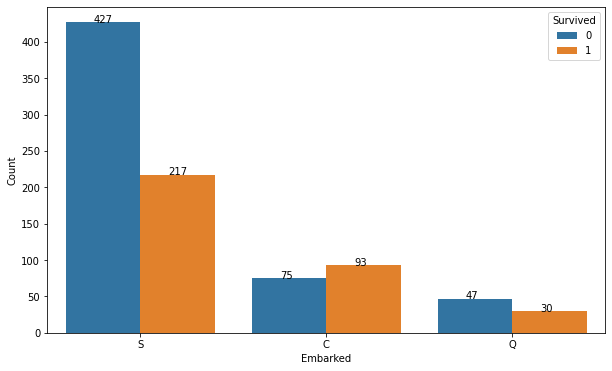

In [ ]:
# 4. survival number by Embarkation
plt.figure(figsize=(10,6))
ax = sns.countplot(data = df, x = 'Embarked', hue = 'Survived')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.xlabel('Embarked')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

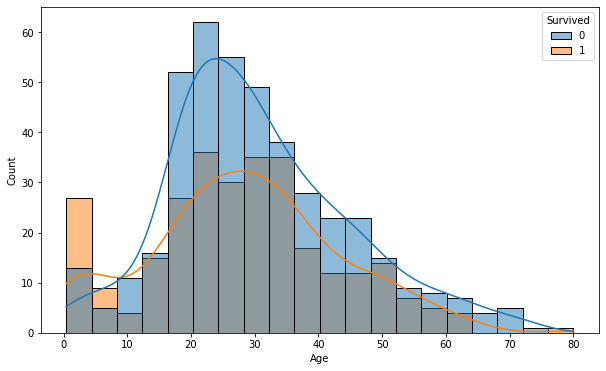

In [ ]:
# 5. survival number by Age
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = 'Age', kde = True, hue = 'Survived')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

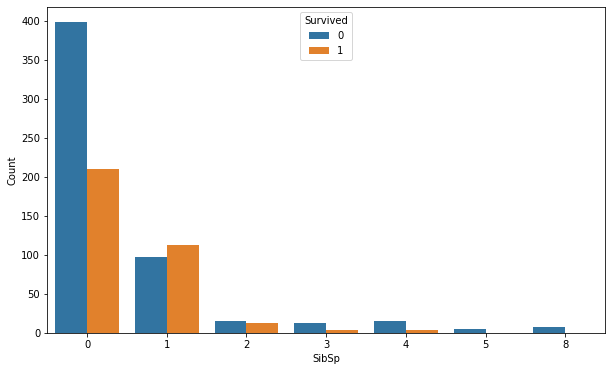

In [ ]:
# 6. survival number by Number of Siblings/Spouses
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'SibSp', hue = 'Survived')
plt.xlabel('SibSp')
plt.ylabel('Count')

In [ ]:
df[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Text(0, 0.5, 'Count')

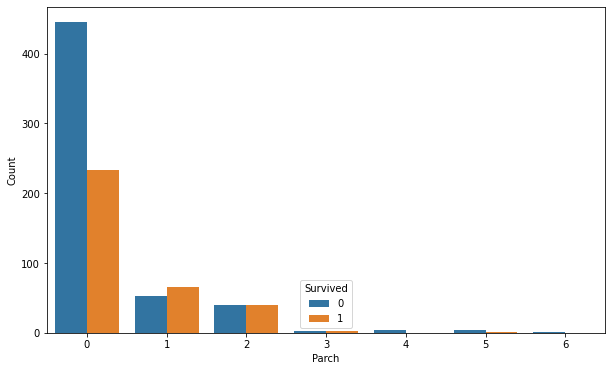

In [ ]:
# 7. survival number by Number of Parents/Children
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Parch', hue = 'Survived')
plt.xlabel('Parch')
plt.ylabel('Count')

In [ ]:
df[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


Text(0, 0.5, 'Count')

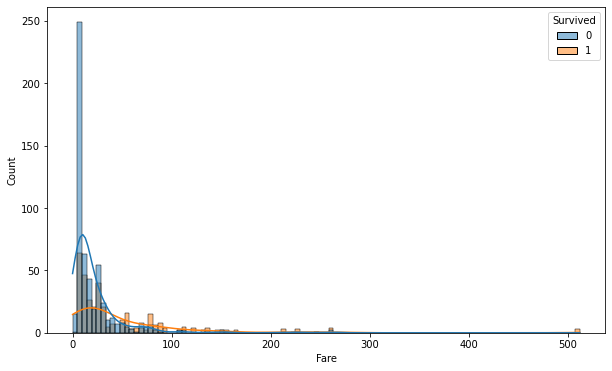

In [ ]:
# 8. survival number by Fare
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = 'Fare', kde = True, hue = 'Survived')
plt.xlabel('Fare')
plt.ylabel('Count')

Text(0.5, 1.0, 'Male Survival Number By Age')

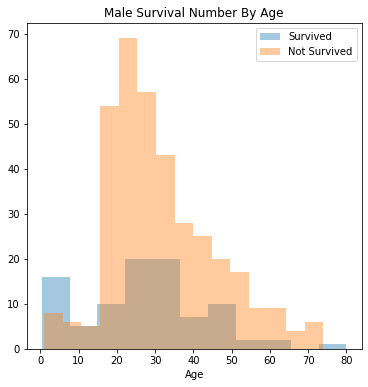

In [ ]:
# 9. survival number by Age for Male
plt.figure(figsize=(6,6))
men = df[df['Sex']=='male']
m = sns.distplot(men[men['Survived']==1].Age, label='Survived', kde=False)
m = sns.distplot(men[men['Survived']==0].Age, label='Not Survived', kde=False)
m.legend()
m.set_title('Male Survival Number By Age')
# m.set_facecolor('white')

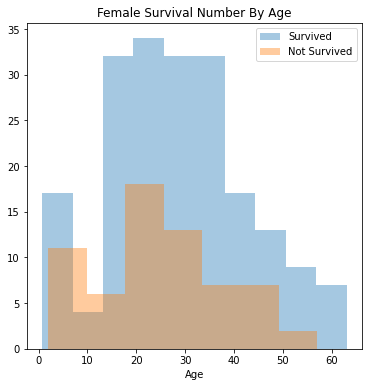

In [ ]:
# 10. survival number by Age for Female
plt.figure(figsize=(6,6))
women = df[df['Sex']=='female']
w = sns.distplot(women[women['Survived']==1].Age, label='Survived', kde=False)
w = sns.distplot(women[women['Survived']==0].Age, label='Not Survived', kde=False)
w.legend()
w.set_title('Female Survival Number By Age')
w.set_facecolor('white')

Text(0.5, 1.0, 'Male Survival Number By Fare')

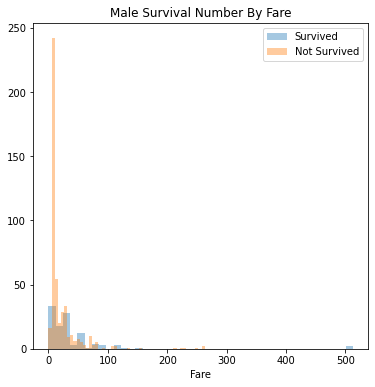

In [ ]:
# 11. survival number by Fare for Male
plt.figure(figsize=(6,6))
men = df[df['Sex']=='male']
m = sns.distplot(men[men['Survived']==1].Fare, label='Survived', kde=False)
m = sns.distplot(men[men['Survived']==0].Fare, label='Not Survived', kde=False)
m.legend()
m.set_title('Male Survival Number By Fare')

Text(0.5, 1.0, 'Female Survival Number By Fare')

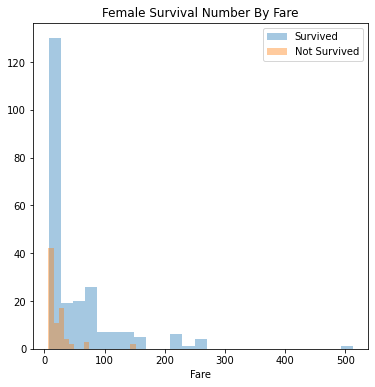

In [ ]:
# 12. survival number by Fare for Female
plt.figure(figsize=(6,6))
women = df[df['Sex']=='female']
w = sns.distplot(women[women['Survived']==1].Fare, label='Survived', kde=False)
w = sns.distplot(women[women['Survived']==0].Fare, label='Not Survived', kde=False)
w.legend()
w.set_title('Female Survival Number By Fare')

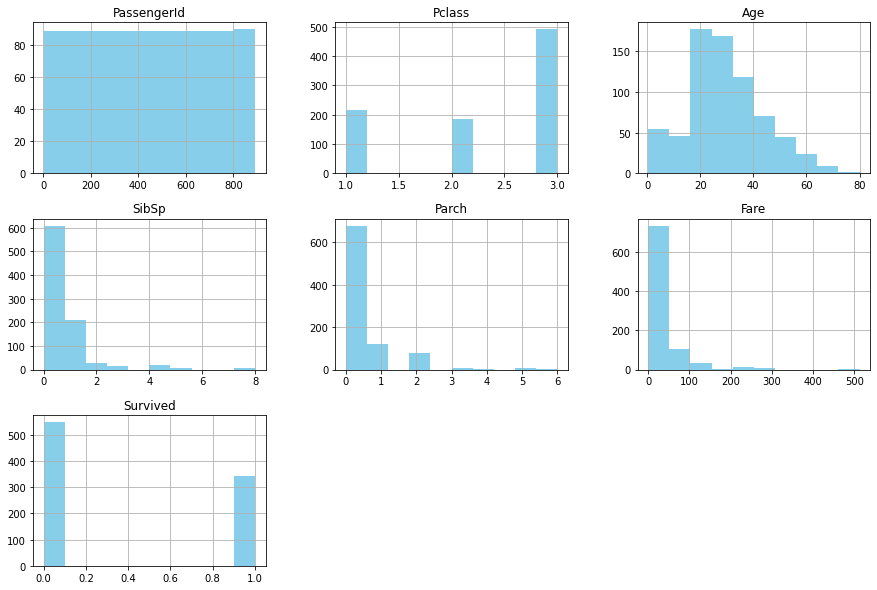

In [ ]:
# 13. Plot distributions and correlations
fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
df.hist(ax = ax, color = 'skyblue')
pass

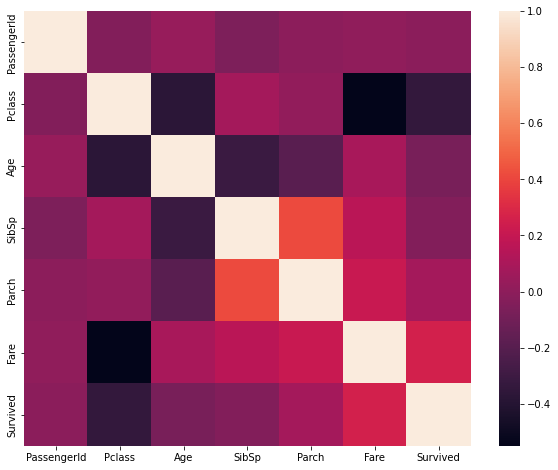

In [ ]:
# 14. correlations between variables
plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr())

**5. Data Splitting**

In [ ]:
# split training and testing data
train, test = train_test_split(df, test_size=0.2)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0
795,796,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,0
616,617,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S,0
163,164,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S,0
107,108,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S,1


**6. Data Processing & Feature Engineering**

In [ ]:
# PassengerId -- drop `PassengerId` from training set, since it is unique and irrelevant to the prediction
train = train.drop(['PassengerId'], axis=1)
train.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
840,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0
795,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,0
616,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S,0
163,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S,0
107,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S,1


In [ ]:
# Pclass -- no need to change, leave it here

In [ ]:
# Name -- extract the titles
data = [train, test] # process both train & test data
for d in data:
  d['Title'] = d.Name.str.extract(r', ([A-Za-z]+)\.') # extract the title and add to a new column

# train['Title'].head()
train.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
840,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0,Mr
795,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,0,Mr
616,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S,0,Mr
163,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S,0,Mr
107,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S,1,Mr


In [ ]:
# Title -- convert those less frequent ones to category 'Other'
train['Title'].value_counts()

Mr          407
Miss        149
Mrs          99
Master       35
Dr            6
Rev           4
Major         2
Mlle          2
Sir           1
Don           1
Col           1
Mme           1
Ms            1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [ ]:
for d in data:
  d['Title'] = d['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Mme', 'Jonkheer', 'Capt', 'Don', 'Sir', 'Lady', 'Ms'], 'Other')
  
train['Title'].value_counts()

Mr        407
Miss      149
Mrs        99
Master     35
Other      21
Name: Title, dtype: int64

In [ ]:
# Title -- convert `Title` to numerical values
titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5}
for d in data:
  d['Title'] = d['Title'].map(titles)
  d['Title'].fillna(0, inplace=True)

d['Title'].head()

341    2
592    1
289    2
668    1
280    1
Name: Title, dtype: int64

In [ ]:
# Name -- after processing `Title`, we can drop the `Name` column
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
840,3,male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0,1.0
795,2,male,39.0,0,0,28213,13.0000,NaN,S,0,1.0
616,3,male,34.0,1,1,347080,14.4000,NaN,S,0,1.0
163,3,male,17.0,0,0,315093,8.6625,NaN,S,0,1.0
107,3,male,NaN,0,0,312991,7.7750,NaN,S,1,1.0


In [ ]:
# Sex -- convert `Sex` to numerical values
for d in data:
  d['Sex'] = d['Sex'].map({'male': 0, 'female': 1})
train['Sex'].value_counts()

0    457
1    255
Name: Sex, dtype: int64

In [ ]:
# Age -- substitue NA with mean values, and convert all the values to integer type
for d in data:
  print("Before: `Age` columns contains %d NA values" % d['Age'].isna().sum())
  age_mean = d.Age.mean()
  d['Age'][np.isnan(d.Age)] = age_mean
  d['Age'] = d['Age'].astype(int)
  print("After: `Age` columns contains %d NA values" % d['Age'].isna().sum())
  print("-----------------------------")


train['Age'].head()

Before: `Age` columns contains 140 NA values
After: `Age` columns contains 0 NA values
-----------------------------
Before: `Age` columns contains 37 NA values
After: `Age` columns contains 0 NA values
-----------------------------


840    20
795    39
616    34
163    17
107    29
Name: Age, dtype: int64

In [ ]:
train['Age'].describe()

count    712.000000
mean      29.337079
std       12.972171
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# Age -- create age groups, and assign them to group index (e.g., group 0: age 0-10; group 1: age 11-20, ...)
for d in data:
  d.loc[(d['Age'] <= 10), 'Age'] = 0
  d.loc[(d['Age'] > 10) & (d['Age'] <= 20), 'Age'] = 1
  d.loc[(d['Age'] > 20) & (d['Age'] <= 30), 'Age'] = 2
  d.loc[(d['Age'] > 30) & (d['Age'] <= 40), 'Age'] = 3
  d.loc[(d['Age'] > 40) & (d['Age'] <= 50), 'Age'] = 4
  d.loc[(d['Age'] > 50) & (d['Age'] <= 60), 'Age'] = 5
  d.loc[(d['Age'] > 60) & (d['Age'] <= 70), 'Age'] = 6
  d.loc[(d['Age'] > 70), 'Age'] = 7
         
train['Age'].value_counts()

2    323
3    126
1     93
4     69
0     54
5     34
6      9
7      4
Name: Age, dtype: int64

In [ ]:
# Embarked -- there are two missing values, fill them with the most common value
train['Embarked'].value_counts()

S    506
C    142
Q     63
Name: Embarked, dtype: int64

In [ ]:
for d in data:
  d['Embarked'].fillna('S', inplace=True)

res = train['Embarked'].isnull().sum() + test['Embarked'].isnull().sum()
res

0

In [ ]:
# Embarked -- convert to numerical values
embark = {'S': 0, 'C': 1, 'Q': 2}
for d in data:
  d['Embarked'] = d['Embarked'].map(embark)

train['Embarked'].value_counts()

0    507
1    142
2     63
Name: Embarked, dtype: int64

In [ ]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
840,3,0,1,0,0,SOTON/O2 3101287,7.9250,NaN,0,0,1.0
795,2,0,3,0,0,28213,13.0000,NaN,0,0,1.0
616,3,0,3,1,1,347080,14.4000,NaN,0,0,1.0
163,3,0,1,0,0,315093,8.6625,NaN,0,0,1.0
107,3,0,2,0,0,312991,7.7750,NaN,0,1,1.0


In [ ]:
# Ticket -- since they are mostly unique, we simply drop the column
train['Ticket'].value_counts()

1601        6
CA. 2343    6
347082      6
347088      5
113760      4
           ..
312991      1
2667        1
17463       1
28220       1
13214       1
Name: Ticket, Length: 558, dtype: int64

In [ ]:
for d in data:
  d.drop(['Ticket'], axis=1, inplace=True)

train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Title
840,3,0,1,0,0,7.9250,NaN,0,0,1.0
795,2,0,3,0,0,13.0000,NaN,0,0,1.0
616,3,0,3,1,1,14.4000,NaN,0,0,1.0
163,3,0,1,0,0,8.6625,NaN,0,0,1.0
107,3,0,2,0,0,7.7750,NaN,0,1,1.0


In [ ]:
# Fare -- split into fare groups, similar to age groups earlier

# use qcut() since it is difficult to evenly split fare, given its wide range of values
train['FareGroupHelper'] = pd.qcut(train['Fare'], 4)
train['FareGroupHelper'].value_counts()

(-0.001, 7.925]      187
(15.048, 31.388]     179
(31.388, 512.329]    177
(7.925, 15.048]      169
Name: FareGroupHelper, dtype: int64

In [ ]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Title,FareGroupHelper
840,3,0,1,0,0,7.9250,NaN,0,0,1.0,"(-0.001, 7.925]"
795,2,0,3,0,0,13.0000,NaN,0,0,1.0,"(7.925, 15.048]"
616,3,0,3,1,1,14.4000,NaN,0,0,1.0,"(7.925, 15.048]"
163,3,0,1,0,0,8.6625,NaN,0,0,1.0,"(7.925, 15.048]"
107,3,0,2,0,0,7.7750,NaN,0,1,1.0,"(-0.001, 7.925]"


In [ ]:
for d in data:
  d.loc[(d['Fare'] <= 7.925), 'Fare'] = 0
  d.loc[(d['Fare'] > 7.925) & (d['Fare'] <= 14.458), 'Fare'] = 1
  d.loc[(d['Fare'] > 14.458) & (d['Fare'] <= 31.275), 'Fare'] = 2
  d.loc[(d['Fare'] > 31.275) & (d['Fare'] <= 513.329), 'Fare'] = 3
  d['Fare'] = d['Fare'].astype(int)

train['Fare'].value_counts()

0    187
2    186
3    180
1    159
Name: Fare, dtype: int64

In [ ]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Title,FareGroupHelper
840,3,0,1,0,0,0,NaN,0,0,1.0,"(-0.001, 7.925]"
795,2,0,3,0,0,1,NaN,0,0,1.0,"(7.925, 15.048]"
616,3,0,3,1,1,1,NaN,0,0,1.0,"(7.925, 15.048]"
163,3,0,1,0,0,1,NaN,0,0,1.0,"(7.925, 15.048]"
107,3,0,2,0,0,0,NaN,0,1,1.0,"(-0.001, 7.925]"


In [ ]:
# Fare -- drop helper column in train dataset
train.drop(['FareGroupHelper'], axis=1, inplace=True)

In [ ]:
# Cabin -- drop the column, as most values are missing, and the non-empty values are mostly unique
train['Cabin'].value_counts()

B96 B98        4
G6             4
C22 C26        3
F33            3
C23 C25 C27    3
              ..
D46            1
A19            1
A14            1
A10            1
E121           1
Name: Cabin, Length: 136, dtype: int64

In [ ]:
# Cabin -- *potential* optimization: extract the first letter from Cabin, which is likely to represent a certal level of class (TODO)
for d in data:
  d.drop(['Cabin'], axis=1, inplace=True)

train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
519,3,0,3,0,0,0,0,0,1
733,2,0,2,0,0,1,0,0,1
843,3,0,3,0,0,0,1,0,1
832,3,0,2,0,0,0,1,0,1
158,3,0,2,0,0,1,0,0,1


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
625,626,1,0,6,0,0,3,0,0,1.0
788,789,3,0,0,1,2,2,0,1,4.0
838,839,3,0,3,0,0,3,0,1,1.0
198,199,3,1,2,0,0,0,2,1,2.0
271,272,3,0,2,0,0,0,0,1,1.0


**7. Supervised Learning**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
# prepare training and testing data
X_train = train.drop(['Survived'], axis=1)
Y_train = train['Survived']
X_test = test.drop(['PassengerId', 'Survived'], axis=1)
Y_test = test['Survived']

Logistic Regression

In [ ]:
m1 = LogisticRegression()
m1.fit(X_train, Y_train)

acc1 = round(m1.score(X_test, Y_test), 3)
acc1

0.804

In [ ]:
Y_pred = m1.predict(X_test)
pre1 = round(precision_score(Y_test, Y_pred), 3)
re1 = round(recall_score(Y_test, Y_pred), 3)
f1_1 = round(f1_score(Y_test, Y_pred), 3)
r1 = (roc_auc_score(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       113
           1       0.82      0.61      0.70        66

    accuracy                           0.80       179
   macro avg       0.81      0.76      0.78       179
weighted avg       0.81      0.80      0.80       179



Stochastic Gradient Descent (SGD)

In [ ]:
m2 = SGDClassifier(max_iter=100, tol=None)
m2.fit(X_train, Y_train)

acc2 = round(m2.score(X_test, Y_test), 3)
acc2

0.793

In [ ]:
Y_pred = m2.predict(X_test)
pre2 = round(precision_score(Y_test, Y_pred), 3)
re2 = round(recall_score(Y_test, Y_pred), 3)
f1_2 = round(f1_score(Y_test, Y_pred), 3)
r2 = (roc_auc_score(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       113
           1       0.76      0.64      0.69        66

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



Random Forest

In [ ]:
m3 = RandomForestClassifier(n_estimators=100)
m3.fit(X_train, Y_train)

acc3 = round(m3.score(X_test, Y_test), 3)
acc3

0.821

In [ ]:
Y_pred = m3.predict(X_test)
pre3 = round(precision_score(Y_test, Y_pred), 3)
re3 = round(recall_score(Y_test, Y_pred), 3)
f1_3 = round(f1_score(Y_test, Y_pred), 3)
r3 = (roc_auc_score(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       113
           1       0.84      0.64      0.72        66

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.80       179
weighted avg       0.82      0.82      0.81       179



Support Vector Machine (SVM)

In [ ]:
m4 = SVC()
m4.fit(X_train, Y_train)

acc4 = round(m4.score(X_test, Y_test), 3)
acc4

0.81

In [ ]:
Y_pred = m4.predict(X_test)
pre4 = round(precision_score(Y_test, Y_pred), 3)
re4 = round(recall_score(Y_test, Y_pred), 3)
f1_4 = round(f1_score(Y_test, Y_pred), 3)
r4 = (roc_auc_score(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       113
           1       0.81      0.64      0.71        66

    accuracy                           0.81       179
   macro avg       0.81      0.77      0.79       179
weighted avg       0.81      0.81      0.80       179



K-Nearest Neighbor

In [ ]:
m5 = KNeighborsClassifier(n_neighbors=5) # use default value of 5 neighbors
m5.fit(X_train, Y_train)

acc5 = round(m5.score(X_test, Y_test), 3)
acc5

0.799

In [ ]:
Y_pred = m5.predict(X_test)
pre5 = round(precision_score(Y_test, Y_pred), 3)
re5 = round(recall_score(Y_test, Y_pred), 3)
f1_5 = round(f1_score(Y_test, Y_pred), 3)
r5 = (roc_auc_score(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       113
           1       0.81      0.59      0.68        66

    accuracy                           0.80       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179



Decision Tree

In [ ]:
m6 = DecisionTreeClassifier()
m6.fit(X_train, Y_train)

acc6 = round(m6.score(X_test, Y_test), 3)
acc6

0.793

In [ ]:
Y_pred = m6.predict(X_test)
pre6 = round(precision_score(Y_test, Y_pred), 3)
re6 = round(recall_score(Y_test, Y_pred), 3)
f1_6 = round(f1_score(Y_test, Y_pred), 3)
r6 = (roc_auc_score(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       113
           1       0.81      0.58      0.67        66

    accuracy                           0.79       179
   macro avg       0.80      0.75      0.76       179
weighted avg       0.80      0.79      0.78       179



**8. Compare Results**

In [ ]:
acc_list = [acc1, acc2, acc3, acc4, acc5, acc6]
pre_list = [pre1, pre2, pre3, pre4, pre5, pre6]
recall_list = [re1, re2, re3, re4, re5, re6]
f1_list = [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6]
roc_list = [r1, r2, r3, r4, r5, r6]
model_list = ['Logistic Regression', 'SGD', 'Random Forest', 'SVM', 'KNN', 'Decision Tree']
res = pd.DataFrame({
    'Model': model_list,
    'Accuracy': acc_list,
    'Precision': pre_list,
    'Recall': recall_list,
    'F1-Score': f1_list,
    'ROC-AUC': roc_list
})
res

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.804,0.816,0.606,0.696,0.763207
1,SGD,0.793,0.764,0.636,0.694,0.760660
2,Random Forest,0.821,0.840,0.636,0.724,0.782784
3,SVM,0.810,0.808,0.636,0.712,0.773934
4,KNN,0.799,0.812,0.591,0.684,0.755632
5,Decision Tree,0.793,0.809,0.576,0.673,0.748056


**9. Conclusion - best performing model & other analysis**

Overall, **Random Forest** is the best performing model, in the sense that it has the highest score in most of the metrics.

More specifically, since we have an imbalance dataset (38% survived vs 62% not suivided), **Accuracy** is less relevant. And before we move on to other metrics, let us define several concepts:

- *True Positive*: the model predicts that the passenger would have survived, and he/she did survive.
- *False Positive*: the model predicts the passenger would have survived, but he/she didn't.
- *True Negative*: the model predicts the passenger would not have survived, and he/she didn't.
- *False Negative*: the model predicts the passenger would not have survived, but he/sha did survived.
- ***Precision***: among all the predicted survivals, how many are actually survived.
- ***Recall***: among all the passengers that are actaully survived, how many did the model successfully predict.

As such, the importance of other metrics depends on the application that the model is being used upon. 

If let's say we want to use this model for rescue resources allocation (i.e. to decide how much resource we want to allocate, in order to rescue passengers in an accident like it), a low **precision** score would result in a wasting of resources as we would allocate more than enough resources, given on the falsely high predicted survival number. On the other hand, a low **recall** score would result in insufficient resources allocated, and we would miss out saving many lives. Hence, depending on whether we have sufficient resources, or whether it is easy to perform the rescue, we would go for different metrics.

In this assignment, since no further context is given, we would use F1-score to achieve a better balance between precision and recall scores.



**10. Extension - Approach for deploying the model into production**

In production environment, we might be dealing with a greater amount of dataset, hence a more complex model could be used.

In addition, we could use the on-demand batch prediction as our approach for deploying into production. This is because offline models can be optimized to handle a high volume data sources and jobs, as well as running more complex models. It is easy for scaling, managing servers, and monimizing computing costs too.

Moreover, we could store the titanic dataset in the cloud, retrieve and split it easily as our training and testing data. We want the response time to be as short as possible (near real-time) because in the case of emergency we have to get the prediction efficiently.

In [ ]:
%%shell
jupyter nbconvert --to html /content/"Leadership_assignment6 (1).ipynb"

[NbConvertApp] Converting notebook /content/Leadership_assignment6 (1).ipynb to html
[NbConvertApp] Writing 657033 bytes to /content/Leadership_assignment6 (1).html
